In [1]:
#import data manipulation library
import numpy as np
import pandas as pd
#import data visualization library
import matplotlib.pyplot as plt
import seaborn as sb
#import filter warning libraries
#Filterwarning will hide all warning messages
import warnings
warnings.filterwarnings('ignore')
#import data logging
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename='app.log',
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
logging.info('Please Upload Dataset For EDA...')

In [3]:
data=pd.read_csv('bank-full.csv',sep=';')

In [4]:
logging.info('The Dataset is Successfully Uploaded')

In [5]:
#Import Data Sample
data.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12910,25,technician,single,tertiary,no,226,no,no,cellular,7,jul,366,2,-1,0,unknown,no
27461,53,management,married,primary,no,13901,yes,no,cellular,21,nov,59,1,-1,0,unknown,no
19262,45,management,divorced,tertiary,no,1,no,no,cellular,6,aug,490,2,-1,0,unknown,yes
10549,45,blue-collar,married,secondary,no,3037,no,no,unknown,16,jun,60,2,-1,0,unknown,no
27297,59,management,married,secondary,no,42,no,no,cellular,21,nov,40,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15753,42,technician,divorced,secondary,no,1858,no,no,cellular,21,jul,61,1,-1,0,unknown,no
39119,28,student,single,tertiary,no,385,yes,no,telephone,18,may,203,5,-1,0,unknown,no
23663,30,technician,divorced,secondary,no,3028,yes,no,cellular,28,aug,65,5,-1,0,unknown,no
41840,57,management,married,tertiary,no,1318,no,no,cellular,16,oct,115,1,185,2,failure,yes


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Insights:
1.The dataset contains 45211 rows and 17 columns

2.Seven Numerical Columns and 10 Categorical Columns,Out of which y is the target.

3.The Data is non-normally distributed

4.As y is our target column,this column shows data imbalance


In [7]:
#split the dataset into categorical and numerical
Numerical_data=data.select_dtypes(exclude='object')

Categorical_Data=data.select_dtypes(include='object')

<function matplotlib.pyplot.show(close=None, block=None)>

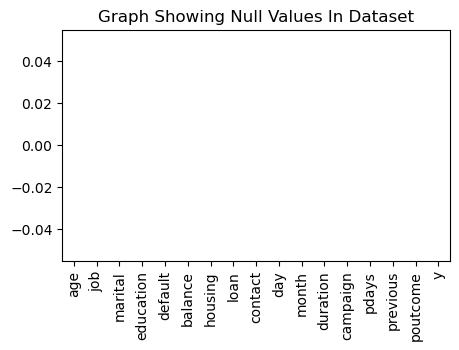

In [8]:
#Chcking for null values if any
plt.figure(figsize=(5,3))
data.isnull().sum().plot(kind='bar')
plt.title('Graph Showing Null Values In Dataset')
plt.show

In [9]:
logging.info('1.The dataset contains 45211 rows and 17 columns')
logging.info('The Data is split into numerical_data and categorical_data')



In [25]:
#performing univariate analysis
from collections import OrderedDict

stats=[]
for i in Numerical_data.columns:
    Numerical_stats=OrderedDict({
        'Feature':i,
        'minimum':Numerical_data[i].min(),
        'maximum':Numerical_data[i].max(),
        'Median':Numerical_data[i].median(),
        'Average':Numerical_data[i].mean(),
        '25%':Numerical_data[i].quantile(0.25),
        '75%':Numerical_data[i].quantile(0.75),
        'Kurtosis':Numerical_data[i].kurtosis(),
        'Standard_Deviation':Numerical_data[i].std(),
        'Skewedness':Numerical_data[i].skew()



    })
    stats.append(Numerical_stats)
report=pd.DataFrame(stats)

report

,Feature,minimum,maximum,Median,Average,25%,75%,Kurtosis,Standard_Deviation,Skewedness
0,age,18,95,39.0,40.936210,33.0,48.0,0.319570,10.618762,0.684818
1,balance,-8019,102127,448.0,1362.272058,72.0,1428.0,140.751547,3044.765829,8.360308
2,day,1,31,16.0,15.806419,8.0,21.0,-1.059897,8.322476,0.093079
3,duration,0,4918,180.0,258.163080,103.0,319.0,18.153915,257.527812,3.144318
4,campaign,1,63,2.0,2.763841,1.0,3.0,39.249651,3.098021,4.898650
5,pdays,-1,871,-1.0,40.197828,-1.0,-1.0,6.935195,100.128746,2.615715
6,previous,0,275,0.0,0.580323,0.0,0.0,4506.860660,2.303441,41.846454


In [31]:
#performing univariate analysis
from collections import OrderedDict

stats_cat=[]
for i in Categorical_Data.columns:
    categorical_stats=OrderedDict({
        'Feature':i,
        'value_count':Categorical_Data[i].nunique()
        


    })
    stats_cat.append(categorical_stats)
report1=pd.DataFrame(stats_cat)

report1

,Feature,value_count
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3
7,month,12
8,poutcome,4
9,y,2
